In [1]:
!pip install scikit-fuzzy --upgrade
#!pip install scikit-fuzzy==0.4.2

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 994.0/994.0 kB 15.9 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
  Created wheel for scikit-fuzzy: filename=scikit_fuzzy-0.4.2-py3-none-any.whl size=894073 sha256=e72a72f4272bb77696c74d7069f9360f56955b55f68e390d4bd0c5639ed91e8e
  Stored in directory: /root/.cache/pip/wheels/4f/86/1b/dfd97134a2c8313e519bcebd95d3fedc7be7944db022094bc8
Successfully built scikit-fuzzy


In [2]:
import pandas as pd
from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt
from google.colab import files
uploaded = files.upload()
import skfuzzy

Saving UCI_Credit_Card.csv to UCI_Credit_Card.csv


In [7]:
base = pd.read_csv('UCI_Credit_Card.csv', header = 0)
base.shape

(30000, 25)

In [8]:
base.head()

,ID,LIMIT_BAL,SEX,EDUCATION,MARRIAGE,AGE,PAY_0,PAY_2,PAY_3,PAY_4,...,BILL_AMT4,BILL_AMT5,BILL_AMT6,PAY_AMT1,PAY_AMT2,PAY_AMT3,PAY_AMT4,PAY_AMT5,PAY_AMT6,default.payment.next.month
0,1,20000.0,2,2,1,24,2,2,-1,-1,...,0.0,0.0,0.0,0.0,689.0,0.0,0.0,0.0,0.0,1
1,2,120000.0,2,2,2,26,-1,2,0,0,...,3272.0,3455.0,3261.0,0.0,1000.0,1000.0,1000.0,0.0,2000.0,1
2,3,90000.0,2,2,2,34,0,0,0,0,...,14331.0,14948.0,15549.0,1518.0,1500.0,1000.0,1000.0,1000.0,5000.0,0
3,4,50000.0,2,2,1,37,0,0,0,0,...,28314.0,28959.0,29547.0,2000.0,2019.0,1200.0,1100.0,1069.0,1000.0,0
4,5,50000.0,1,2,1,57,-1,0,-1,0,...,20940.0,19146.0,19131.0,2000.0,36681.0,10000.0,9000.0,689.0,679.0,0


In [9]:
base['BILL_TOTAL'] = base['BILL_AMT1'] +base['BILL_AMT2'] +base['BILL_AMT3'] +base['BILL_AMT4'] +base['BILL_AMT5'] +base['BILL_AMT6']

In [10]:
X = base.iloc[:,[1,25]].values

In [11]:
X.shape

(30000, 2)

In [12]:
r = skfuzzy.cmeans(data = X.T, c = 3, m = 2, error=0.005, maxiter=1000, init=None)

In [13]:
r

(array([[ 140102.36155612,   80565.46504687],
        [ 175795.85713523,  491926.59343287],
        [ 308714.97906077, 1332270.71797981]]),
 array([[0.91996037, 0.97855707, 0.98001031, ..., 0.93563686, 0.59885241,
         0.71957022],
        [0.07016173, 0.01898461, 0.01813605, ..., 0.05751355, 0.38187789,
         0.26316521],
        [0.00987789, 0.00245832, 0.00185364, ..., 0.00684959, 0.0192697 ,
         0.01726457]]),
 array([[0.03616755, 0.63050863, 0.32963905, ..., 0.19663674, 0.35631186,
         0.42738162],
        [0.49094332, 0.01484696, 0.13440445, ..., 0.66076892, 0.00626614,
         0.34839809],
        [0.47288913, 0.35464442, 0.5359565 , ..., 0.14259434, 0.637422  ,
         0.22422029]]),
 array([[ 140475.51509119,   66594.97078715,   54359.27486547, ...,
          110561.85665303,  195512.74879306,  175245.80233987],
        [ 508668.72234427,  478116.42311974,  399592.80127722, ...,
          445937.41381384,  244834.56228294,  289781.04529181],
        [1355667

In [14]:
previsoes_porcentagem = r[1]

In [15]:
previsoes_porcentagem.shape

(3, 30000)

In [16]:
previsoes_porcentagem

array([[0.91996037, 0.97855707, 0.98001031, ..., 0.93563686, 0.59885241,
        0.71957022],
       [0.07016173, 0.01898461, 0.01813605, ..., 0.05751355, 0.38187789,
        0.26316521],
       [0.00987789, 0.00245832, 0.00185364, ..., 0.00684959, 0.0192697 ,
        0.01726457]])

In [17]:
previsoes_porcentagem[0][0]

0.9199603733353654

In [18]:
previsoes_porcentagem[1][0]

0.07016173488101109

In [19]:
previsoes_porcentagem[2][0]

0.009877891783623598

In [20]:
previsoes_porcentagem[0][0] + previsoes_porcentagem [1][0] + previsoes_porcentagem [2][0]

1.0

In [21]:
previsoes = previsoes_porcentagem.argmax(axis=0)

In [22]:
previsoes

array([0, 0, 0, ..., 0, 0, 0])

In [23]:
previsoes[5000]

0

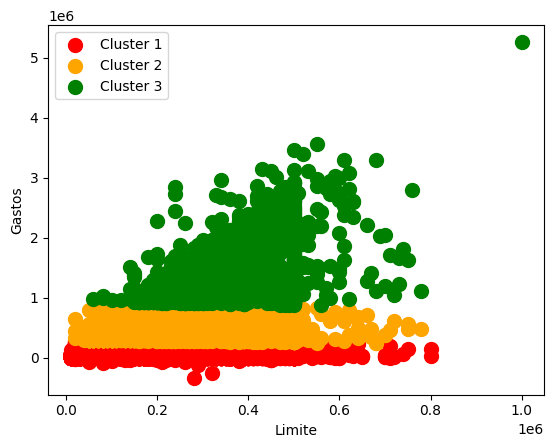

In [24]:
plt.scatter(X[previsoes == 0, 0], X[previsoes == 0, 1], s = 100, c = 'red', label = 'Cluster 1')
plt.scatter(X[previsoes == 1, 0], X[previsoes == 1, 1], s = 100, c = 'orange', label = 'Cluster 2')
plt.scatter(X[previsoes == 2, 0], X[previsoes == 2, 1], s = 100, c = 'green', label = 'Cluster 3')
plt.xlabel('Limite')
plt.ylabel('Gastos')
plt.legend();